In [1]:
import pandas as pd
import re
import numpy as np
import collections
import math
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

# Preproccess

In [2]:
class DataPreprocessor:
    def __init__(self,data_path):
        self.data_path=data_path
        self.data=self.read_data()
        self.cleaned_data=self.clean_text()
        self.frequencies=self.count_words(self.cleaned_data)
        self.WordToIndex,self.IndexToWord=self.map_word_index()
    def read_data(self):
        data = pd.read_csv(self.data_path,delimiter='\t')
        data['input']=data['title'] + data['text']
        return data
    def plot_distribution(self):
        g=self.data.groupby('category')['input'].nunique()[1:]
        dg=dict(g)
        dg2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in dg.items()}
        df = pd.DataFrame(dg2.items(), columns=['category', 'count'])
        df.plot(kind='bar',x='category',y='count')
    def clean_text(self):
        self.data.dropna(subset=['input', 'category'],inplace= True)
        cleaned_input=[]
        cleaned_category=[]
        for i1 in self.data["input"]:
            st1=re.sub(r"[^۰-۹\ئ\ء\آ\ا-ی\.\؟]"," ",i1)
            st1=re.sub(r"[۰-۹]+","N",st1)
            cleaned_input.append(st1)
        for i2 in self.data["category"]:
            st2=re.sub(r"[^۰-۹\ئ\ء\آ\ا-ی\.\؟]"," ",i2)
            st2=re.sub(r"[۰-۹]+","N",st2)
            cleaned_category.append(st2)
        cleaned_data=pd.DataFrame({'input':cleaned_input , 'category':cleaned_category})
        return cleaned_data
    def count_words(self,cleaned_data):
        all_tokens=[]
        for j in cleaned_data["input"]:
            sp=j.split()
            for k in sp:
                all_tokens.append(k)
        frequencies = collections.Counter(all_tokens)
        sort=sorted(frequencies.items(), key=lambda item: item[1],reverse=True)
        frequencies=dict(sort)
        return frequencies
    def map_word_index(self):
        list=[]
        for key in self.frequencies.keys():
            list.append(key)
        list2=[]
        list3=[]
        for i in range(len(list)):
            list2.append((list[i],i))
            list3.append((i,list[i]))
        WordToIndex=dict(list2)
        IndexToWord=dict(list3)
        return WordToIndex,IndexToWord
    def tokenize(self,string):
        list4=[]
        a=string.split()
        for m in a:
            if(m in self.WordToIndex.keys()):
                list4.append(self.WordToIndex.get(m))
            else:
                list4.append(-1)
        return list4

In [3]:
object1=DataPreprocessor('train.csv')

In [4]:
object1.data

,link,title,code_news,category,date,text,input
0,/fa/news/6276899/اسفراین-جولانگاه-مقدونیان-تصا...,اسفراین؛ جولانگاه مقدونیان + تصاویر,کد خبر: ۶۲۷۶۸۹۹,فرهنگی هنری,تاریخ انتشار: ۲۱ مهر ۱۳۹۶ - ۰۷:۰۴,به گزارش خبرنگار حوزه میراث و گردشگری گروه فر...,اسفراین؛ جولانگاه مقدونیان + تصاویر به گزارش خ...
1,/fa/news/4626291/اجرای-قطعات-سلام-آقا-بدون-انگ...,"اجرای قطعات ""سلام آقا"" بدون انگیزه مالی و با ا...",کد خبر: ۴۶۲۶۲۹۱,فرهنگی هنری,تاریخ انتشار: ۱۹ آبان ۱۳۹۲ - ۱۰:۰۰,به گزارش حوزه موسیقی باشگاه خبرنگاران، مهدی ی...,"اجرای قطعات ""سلام آقا"" بدون انگیزه مالی و با ا..."
2,/fa/news/4632846/حکایت-سیاریحون-از-نهضت-میرزا-...,"حکایت ""سیاریحون"" از نهضت میرزا کوچک خان جنگلی ...",کد خبر: ۴۶۳۲۸۴۶,فرهنگی هنری,تاریخ انتشار: ۲۵ آبان ۱۳۹۲ - ۱۳:۴۵,به گزارش حوزه تئاتر باشگاه خبرنگاران به نقل ا...,"حکایت ""سیاریحون"" از نهضت میرزا کوچک خان جنگلی ..."
3,/fa/news/5058438/گفتگو-با-کارگردان-سریال-شهید-...,گفتگو با کارگردان سریال شهید مدرس/قدرت بیان فو...,کد خبر: ۵۰۵۸۴۳۸,فرهنگی هنری,تاریخ انتشار: ۱۰ آذر ۱۳۹۳ - ۱۰:۵۴,به گزارش خبرنگار رادیو تلویزیون باشگاه خبرنگا...,گفتگو با کارگردان سریال شهید مدرس/قدرت بیان فو...
4,/fa/news/6668241/گزارش-تصویری-مراسم-عزاداری-شب...,گزارش تصویری مراسم عزاداری شب ششم محرم ۹۷/ حضو...,کد خبر: ۶۶۶۸۲۴۱,فرهنگی هنری,تاریخ انتشار: ۲۵ شهريور ۱۳۹۷ - ۱۰:۳۵,به گزارش خبرنگار تکیه حسینی گروه فرهنگی باشگا...,گزارش تصویری مراسم عزاداری شب ششم محرم ۹۷/ حضو...
...,...,...,...,...,...,...,...
117182,/fa/news/6513525/منتخب-لحظات-برتر-اینیستا-فیلم\n,منتخب لحظات برتر اینیستا + فیلم,کد خبر: ۶۵۱۳۵۲۵,ورزشی,تاریخ انتشار: ۰۵ ارديبهشت ۱۳۹۷ - ۲۱:۲۸,به گزارش گروه فیلم و صوت باشگاه خبرنگاران جوا...,منتخب لحظات برتر اینیستا + فیلم به گزارش گروه ...
117187,/fa/news/5987093/پرسپولیس-ایران-الهلال-عربستان...,پرسپولیس ایران _ الهلال عربستان/ پرتماشاگرترین...,کد خبر: ۵۹۸۷۰۹۳,ورزشی,تاریخ انتشار: ۰۳ اسفند ۱۳۹۵ - ۱۰:۰۰,به گزارش\r\nخبرنگار حوزه فوتبال و فوتسال گروه...,پرسپولیس ایران _ الهلال عربستان/ پرتماشاگرترین...
117188,/fa/news/4800268/شیاپ-چانگ-انتخابی-برای-پومسه-...,شیاپ چانگ انتخابی برای پومسه رو ها,کد خبر: ۴۸۰۰۲۶۸,ورزشی,تاریخ انتشار: ۲۲ فروردين ۱۳۹۳ - ۱۳:۳۷,به گزارش خبرنگار\r\nورزشی باشگاه خبرنگاران؛ ر...,شیاپ چانگ انتخابی برای پومسه رو ها به گزارش خب...
117190,/fa/news/6637446/نویمایر-آلمانی-آری-جپاروف-ازب...,نویمایر آلمانی آری جپاروف ازبک خیر/منطق قراردا...,کد خبر: ۶۶۳۷۴۴۶,ورزشی,تاریخ انتشار: ۰۸ مهر ۱۳۹۷ - ۱۴:۳۳,به گزارش خبرنگار فوتبال و فوتسال گروه ورزشی ...,نویمایر آلمانی آری جپاروف ازبک خیر/منطق قراردا...


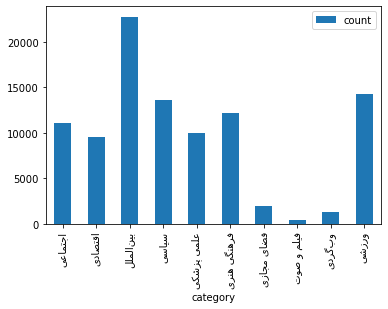

In [5]:
object1.plot_distribution()

In [6]:
cleaned_train=object1.cleaned_data
cleaned_train

,input,category
0,اسفراین جولانگاه مقدونیان تصاویر به گزارش خ...,فرهنگی هنری
1,اجرای قطعات سلام آقا بدون انگیزه مالی و با ا...,فرهنگی هنری
2,حکایت سیاریحون از نهضت میرزا کوچک خان جنگلی ...,فرهنگی هنری
3,گفتگو با کارگردان سریال شهید مدرس قدرت بیان فو...,فرهنگی هنری
4,گزارش تصویری مراسم عزاداری شب ششم محرم N حضور...,فرهنگی هنری
...,...,...
97025,منتخب لحظات برتر اینیستا فیلم به گزارش گروه ...,ورزشی
97026,پرسپولیس ایران الهلال عربستان پرتماشاگرترین...,ورزشی
97027,شیاپ چانگ انتخابی برای پومسه رو ها به گزارش خب...,ورزشی
97028,نویمایر آلمانی آری جپاروف ازبک خیر منطق قراردا...,ورزشی


In [19]:
object1.data["input"][0]

'اسفراین؛ جولانگاه مقدونیان + تصاویر به گزارش خبرنگار حوزه میراث و گردشگری\xa0گروه فرهنگی باشگاه خبرنگاران جوان؛ محمد حسن خان اعتماد السلطنه به نقل از برخی منابع، اسفراین \xa0را چمن کالپوش دانسته است. چمن کالپوش بر اساس آنچه در اعتقادات اهالی منطقه مشهود است، آخرین منزلگاه داریوش سوم است. بنابراین باید دشت اسفراین را جولانگاه مقدونیان دانست. این دشت از دستبرد و سم ستوران یونانی در امان نبوده است. بنا بر این گزارش، شهر اسفراین امروزی در شمال غربی استان خراسان شمالی قرار گرفته است. این شهر دربرگیرنده بیش از ۲۵ بقعه از بزرگان و امامزادگان است. شایان ذکر است؛ شهر فعلی اسفراین از ۱۹ محله تشکیل شده و زیستگاه حیواناتی، چون آهو، گرگ، گورکن، خرگوش، روباه، گراز، پلنگ، کفتار و بز کوهی است. منطقه حفاظت\u200cشده ساری گل در شمال شرقی اسفراین قرار گرفته است. گفتنی است؛ ابوعبدلله حمد بن احمد مقدسی در خصوص اسفراین می\u200cنویسد: اسفراین روستایی بزرگ و مرکز انگور خوب و کشتزار است، جاده گرگان آن را به دو نیمه می\u200cکند. شهر آن به همین نام است. آباد و گرانقدر است، از نهری که از کوه می\u200cآید می\u200cآ

In [20]:
cleaned_train["input"][0]

'اسفراین  جولانگاه مقدونیان   تصاویر به گزارش خبرنگار حوزه میراث و گردشگری گروه فرهنگی باشگاه خبرنگاران جوان  محمد حسن خان اعتماد السلطنه به نقل از برخی منابع  اسفراین  را چمن کالپوش دانسته است. چمن کالپوش بر اساس آنچه در اعتقادات اهالی منطقه مشهود است  آخرین منزلگاه داریوش سوم است. بنابراین باید دشت اسفراین را جولانگاه مقدونیان دانست. این دشت از دستبرد و سم ستوران یونانی در امان نبوده است. بنا بر این گزارش  شهر اسفراین امروزی در شمال غربی استان خراسان شمالی قرار گرفته است. این شهر دربرگیرنده بیش از N بقعه از بزرگان و امامزادگان است. شایان ذکر است  شهر فعلی اسفراین از N محله تشکیل شده و زیستگاه حیواناتی  چون آهو  گرگ  گورکن  خرگوش  روباه  گراز  پلنگ  کفتار و بز کوهی است. منطقه حفاظت شده ساری گل در شمال شرقی اسفراین قرار گرفته است. گفتنی است  ابوعبدلله حمد بن احمد مقدسی در خصوص اسفراین می نویسد  اسفراین روستایی بزرگ و مرکز انگور خوب و کشتزار است  جاده گرگان آن را به دو نیمه می کند. شهر آن به همین نام است. آباد و گرانقدر است  از نهری که از کوه می آید می آشامند در شهر های این روستا مهم تر

In [21]:
object1.data["input"][1]

'اجرای قطعات "سلام آقا" بدون انگیزه مالی و با اعتقاد عمیق همراه بود به گزارش حوزه موسیقی باشگاه خبرنگاران، مهدی یغمایی، خواننده\u200cی جوان و خوش ذوق موسیقی پاپ به گفته خود یکی از نوادگان "یغمای جندقی" شاعر مرثیه سرای قرن 13 هجری است، وی در سال 89 در آلبوم زیبا و دلنشین "سلام آقا" که به پیشگاه مقدس و سرور و سالار شهیدان و خاندان پاکشان تقدیم شد، به همراه جمعی از ستارگان موسیقی پاپ به اجرای قطعات ماندگار و دلنشین پرداخت که به این بهانه به گفتگو با وی نشسته\u200cایم. *"آقای یغمایی" در ساخت قطعاتی که به پیشگاه مقدس امام حسین (ع) و خاندان پاک ایشان تقدیم می\u200cشود، چه عواملی باید وجود داشته باشد؟ *"آقای یغمایی" در ساخت قطعاتی که به پیشگاه مقدس امام حسین (ع) و خاندان پاک ایشان تقدیم می\u200cشود، چه عواملی باید وجود داشته باشد؟ ساخت این قطعات، مستلزم اعتقاد قلبی عمیق است در آلبوم "سلام آقا" من بدون هیچ قراردادی 4 قطعه را اجرا کردم و به طور کلی از عمق وجودم به اجرای این قطعات پرداختم.در این مجموعه برای من انگیزه مالی به هیچ عنوان مطرح نبوده و وقتی این آلبوم مجوز گرفت، سجده شکر کردم. ساخت ای

In [23]:
cleaned_train["input"][1]

'اجرای قطعات  سلام آقا  بدون انگیزه مالی و با اعتقاد عمیق همراه بود به گزارش حوزه موسیقی باشگاه خبرنگاران  مهدی یغمایی  خواننده ی جوان و خوش ذوق موسیقی پاپ به گفته خود یکی از نوادگان  یغمای جندقی  شاعر مرثیه سرای قرن    هجری است  وی در سال    در آلبوم زیبا و دلنشین  سلام آقا  که به پیشگاه مقدس و سرور و سالار شهیدان و خاندان پاکشان تقدیم شد  به همراه جمعی از ستارگان موسیقی پاپ به اجرای قطعات ماندگار و دلنشین پرداخت که به این بهانه به گفتگو با وی نشسته ایم.   آقای یغمایی  در ساخت قطعاتی که به پیشگاه مقدس امام حسین  ع  و خاندان پاک ایشان تقدیم می شود  چه عواملی باید وجود داشته باشد؟   آقای یغمایی  در ساخت قطعاتی که به پیشگاه مقدس امام حسین  ع  و خاندان پاک ایشان تقدیم می شود  چه عواملی باید وجود داشته باشد؟ ساخت این قطعات  مستلزم اعتقاد قلبی عمیق است در آلبوم  سلام آقا  من بدون هیچ قراردادی   قطعه را اجرا کردم و به طور کلی از عمق وجودم به اجرای این قطعات پرداختم.در این مجموعه برای من انگیزه مالی به هیچ عنوان مطرح نبوده و وقتی این آلبوم مجوز گرفت  سجده شکر کردم. ساخت این قطعات  مستلزم اعتق

In [24]:
object1.data["input"][2]

'حکایت "سیاریحون" از نهضت میرزا کوچک خان جنگلی در حوزه هنری به گزارش حوزه تئاتر باشگاه خبرنگاران به نقل از\xa0 روابط عمومی مرکز هنرهای نمایشی حوزه هنری، پژمان کاشفی، کارگردان این اثر نمایشی، اظهار کرد: نمایش "سیاریحون" را حدود هشت سال پیش حمید ابراهیمی به صحنه برده بود که من نیز در آن پروژه همکاری داشتم. از آنجا که این متن را خیلی دوست داشتم و اکنون، زمان را برای اجرای دوباره آن مناسب دیدم، تصمیم گرفتم این متن را امسال در بیست و دومین جشنواره\u200c سراسری تئاتر "سوره\u200c ماه" شرکت دهم که به لطف خدا اجرای این نمایش در جشنواره با استقبال مخاطبان و تماشاگران مواجه شد. وی در مورد تغییرات ایجاد شده در اجرای "سیاریحون" نسبت به اجرای هشت سال پیش توضیح داد: در این کار از ایده\u200cهای حمید ابراهیمی عزیز، بسیار استفاده کرده\u200cام و با اینکه او در این پروژه همراه ما نبود، ایده\u200cهایش همچون ایده\u200cهای یک استاد راهنما در روند تکمیل کار من موثر بود، ولی با این حال تغییراتی را در اجرا و قسمت\u200cهایی از متن ایجاد کرده\u200cایم که گرچه حمید ابراهیمی به عنوان نویسنده چندان موافق آن نبود، ام

In [25]:
cleaned_train["input"][2]

'حکایت  سیاریحون  از نهضت میرزا کوچک خان جنگلی در حوزه هنری به گزارش حوزه تئاتر باشگاه خبرنگاران به نقل از  روابط عمومی مرکز هنرهای نمایشی حوزه هنری  پژمان کاشفی  کارگردان این اثر نمایشی  اظهار کرد  نمایش  سیاریحون  را حدود هشت سال پیش حمید ابراهیمی به صحنه برده بود که من نیز در آن پروژه همکاری داشتم. از آنجا که این متن را خیلی دوست داشتم و اکنون  زمان را برای اجرای دوباره آن مناسب دیدم  تصمیم گرفتم این متن را امسال در بیست و دومین جشنواره  سراسری تئاتر  سوره  ماه  شرکت دهم که به لطف خدا اجرای این نمایش در جشنواره با استقبال مخاطبان و تماشاگران مواجه شد. وی در مورد تغییرات ایجاد شده در اجرای  سیاریحون  نسبت به اجرای هشت سال پیش توضیح داد  در این کار از ایده های حمید ابراهیمی عزیز  بسیار استفاده کرده ام و با اینکه او در این پروژه همراه ما نبود  ایده هایش همچون ایده های یک استاد راهنما در روند تکمیل کار من موثر بود  ولی با این حال تغییراتی را در اجرا و قسمت هایی از متن ایجاد کرده ایم که گرچه حمید ابراهیمی به عنوان نویسنده چندان موافق آن نبود  اما فکر می کنم توانسته ایم با این تغییرات  جذ

In [26]:
frequencies_train=object1.frequencies
frequencies_train

{'و': 1403990,
 'در': 1181915,
 'به': 1007954,
 'از': 740319,
 'این': 493071,
 'با': 479038,
 'که': 474465,
 'را': 448643,
 'می': 397081,
 'های': 350765,
 'است': 284295,
 'ها': 204262,
 'برای': 195601,
 'آن': 144898,
 'است.': 142447,
 'کرد': 137269,
 'شده': 131691,
 'خود': 126245,
 '.': 115566,
 'بر': 115174,
 'گفت': 115042,
 'تا': 111458,
 'یک': 108705,
 'N': 107997,
 'باشگاه': 105540,
 'کشور': 102474,
 'ای': 98950,
 'ایران': 97835,
 'خبرنگاران': 97038,
 'وی': 94741,
 'سال': 94656,
 'گزارش': 93092,
 'ما': 84780,
 'شود': 81476,
 'گروه': 80457,
 'هم': 79000,
 'شد': 73302,
 'باید': 67656,
 'نیز': 66746,
 'اين': 65807,
 'قرار': 64737,
 'ادامه': 64715,
 'کرده': 62296,
 'اما': 59696,
 'شود.': 58908,
 'جوان': 58553,
 'بود': 57872,
 'بین': 56563,
 'روز': 54424,
 'خواهد': 53989,
 'تیم': 53983,
 'برنامه': 53039,
 'دو': 52840,
 'هر': 52179,
 'تهران': 50902,
 'افزود': 50463,
 'دولت': 50051,
 'مردم': 49803,
 'آمریکا': 48867,
 'خبرنگار': 48096,
 'انجام': 47277,
 'اینکه': 47008,
 'کند': 46970,
 'ساز

In [27]:
n_unique_tokens_train=len(frequencies_train.keys())
n_unique_tokens_train

313036

In [28]:
n_tokens_train=sum(frequencies_train.values())
n_tokens_train

33456679

In [29]:
file1 = open('frequent.txt', 'w',encoding="utf-8")
fdict = dict(list(frequencies_train.items())[:200]) 
for key in fdict.keys():
    st=str(key+" "+str(frequencies_train[key])+"\n")
    file1.write(st)
file1.close()

In [30]:
WordToIndex=object1.WordToIndex
WordToIndex

{'و': 0,
 'در': 1,
 'به': 2,
 'از': 3,
 'این': 4,
 'با': 5,
 'که': 6,
 'را': 7,
 'می': 8,
 'های': 9,
 'است': 10,
 'ها': 11,
 'برای': 12,
 'آن': 13,
 'است.': 14,
 'کرد': 15,
 'شده': 16,
 'خود': 17,
 '.': 18,
 'بر': 19,
 'گفت': 20,
 'تا': 21,
 'یک': 22,
 'N': 23,
 'باشگاه': 24,
 'کشور': 25,
 'ای': 26,
 'ایران': 27,
 'خبرنگاران': 28,
 'وی': 29,
 'سال': 30,
 'گزارش': 31,
 'ما': 32,
 'شود': 33,
 'گروه': 34,
 'هم': 35,
 'شد': 36,
 'باید': 37,
 'نیز': 38,
 'اين': 39,
 'قرار': 40,
 'ادامه': 41,
 'کرده': 42,
 'اما': 43,
 'شود.': 44,
 'جوان': 45,
 'بود': 46,
 'بین': 47,
 'روز': 48,
 'خواهد': 49,
 'تیم': 50,
 'برنامه': 51,
 'دو': 52,
 'هر': 53,
 'تهران': 54,
 'افزود': 55,
 'دولت': 56,
 'مردم': 57,
 'آمریکا': 58,
 'خبرنگار': 59,
 'انجام': 60,
 'اینکه': 61,
 'کند': 62,
 'سازمان': 63,
 'دارد': 64,
 'مي': 65,
 'حوزه': 66,
 'كه': 67,
 'رئیس': 68,
 'داد': 69,
 'هزار': 70,
 'عنوان': 71,
 'کار': 72,
 'اشاره': 73,
 'مورد': 74,
 'اسلامی': 75,
 'صورت': 76,
 'اعلام': 77,
 'شد.': 78,
 'حضور': 79,
 'پس': 80,
 

In [31]:
IndexToWord=object1.IndexToWord
IndexToWord

{0: 'و',
 1: 'در',
 2: 'به',
 3: 'از',
 4: 'این',
 5: 'با',
 6: 'که',
 7: 'را',
 8: 'می',
 9: 'های',
 10: 'است',
 11: 'ها',
 12: 'برای',
 13: 'آن',
 14: 'است.',
 15: 'کرد',
 16: 'شده',
 17: 'خود',
 18: '.',
 19: 'بر',
 20: 'گفت',
 21: 'تا',
 22: 'یک',
 23: 'N',
 24: 'باشگاه',
 25: 'کشور',
 26: 'ای',
 27: 'ایران',
 28: 'خبرنگاران',
 29: 'وی',
 30: 'سال',
 31: 'گزارش',
 32: 'ما',
 33: 'شود',
 34: 'گروه',
 35: 'هم',
 36: 'شد',
 37: 'باید',
 38: 'نیز',
 39: 'اين',
 40: 'قرار',
 41: 'ادامه',
 42: 'کرده',
 43: 'اما',
 44: 'شود.',
 45: 'جوان',
 46: 'بود',
 47: 'بین',
 48: 'روز',
 49: 'خواهد',
 50: 'تیم',
 51: 'برنامه',
 52: 'دو',
 53: 'هر',
 54: 'تهران',
 55: 'افزود',
 56: 'دولت',
 57: 'مردم',
 58: 'آمریکا',
 59: 'خبرنگار',
 60: 'انجام',
 61: 'اینکه',
 62: 'کند',
 63: 'سازمان',
 64: 'دارد',
 65: 'مي',
 66: 'حوزه',
 67: 'كه',
 68: 'رئیس',
 69: 'داد',
 70: 'هزار',
 71: 'عنوان',
 72: 'کار',
 73: 'اشاره',
 74: 'مورد',
 75: 'اسلامی',
 76: 'صورت',
 77: 'اعلام',
 78: 'شد.',
 79: 'حضور',
 80: 'پس',
 

In [32]:
file2 = open('WordToIndex.txt', 'w',encoding="utf-8")
for key in WordToIndex:
    st=str(key+":"+str(WordToIndex[key])+"\n")
    file2.write(st)
file2.close()

In [33]:
object1.tokenize("شهر اسفراین امروزی در شمال غربی استان خراسان شمالی قرار گرفته است")

[128, 14831, 5819, 1, 806, 787, 122, 1138, 728, 40, 141, 10]

In [34]:
object2=DataPreprocessor('test.csv')

In [35]:
object2.data

,link,title,code_news,category,date,text,input
0,/fa/news/4943808/چشم-آسمان-به-مناظر-ایران-روشن...,"""چشم آسمان"" به مناظر ایران روشن شد",کد خبر: ۴۹۴۳۸۰۸,فرهنگی هنری,تاریخ انتشار: ۲۲ مرداد ۱۳۹۳ - ۱۲:۰۵,به گزارشحوزه ادبیات باشگاه خبرنگاران ؛ این کت...,"""چشم آسمان"" به مناظر ایران روشن شد به گزارشحوز..."
1,/fa/news/3677588/محمدعلي-محمديانحراف-معيارها-م...,محمدعلي محمدي:انحراف معيارها مولد مشكلات حوزه ...,کد خبر: ۳۶۷۷۵۸۸,فرهنگی هنری,تاریخ انتشار: ۱۵ فروردين ۱۳۹۱ - ۱۷:۱۰,محمدعلي محمدي سراينده نخستين شعر دفاع مقدس در...,محمدعلي محمدي:انحراف معيارها مولد مشكلات حوزه ...
2,/fa/news/5260496/اعلام-مجموعه-سریال‌های-شبکه-پ...,اعلام مجموعه سریال‌های شبکه پنج بعد‌از عید فطر,کد خبر: ۵۲۶۰۴۹۶,فرهنگی هنری,تاریخ انتشار: ۲۲ تير ۱۳۹۴ - ۰۹:۵۱,مهدی روشن‌روان، مدیر گروه فیلم و سریال شبکه پ...,اعلام مجموعه سریال‌های شبکه پنج بعد‌از عید فطر...
3,/fa/news/4933001/اعلام-اسامی-مستند-های-جشنواره...,اعلام اسامی مستند های جشنواره فیلم مقاومت,کد خبر: ۴۹۳۳۰۰۱,فرهنگی هنری,تاریخ انتشار: ۱۳ مرداد ۱۳۹۳ - ۱۱:۲۰,به گزارش حوزه سینما باشگاه خبرنگاران به نقل ا...,اعلام اسامی مستند های جشنواره فیلم مقاومت به گ...
4,/fa/news/5446271/تهرانگردی-به-خیابان-سی-تیر-رس...,تهرانگردی به خیابان سی تیر رسید,کد خبر: ۵۴۴۶۲۷۱,فرهنگی هنری,تاریخ انتشار: ۱۲ دی ۱۳۹۴ - ۰۸:۴۵,به گزارش حوزه میراث و گردشگری گروه فرهنگی باش...,تهرانگردی به خیابان سی تیر رسید به گزارش حوزه ...
...,...,...,...,...,...,...,...
21098,/fa/news/5565219/صعود-سیتیزن-ها-با-حذف-پاریسی-...,صعود سیتیزن ها با حذف پاریسی ها,کد خبر: ۵۵۶۵۲۱۹,ورزشی,تاریخ انتشار: ۲۴ فروردين ۱۳۹۵ - ۲۲:۴۴,ترکیب اصلی دو تیم به این شرح است. منچستر سیت...,صعود سیتیزن ها با حذف پاریسی ها ترکیب اصلی دو...
21099,/fa/news/6118173/توصیف-احسان-پهلوان-از-حال-و-ر...,توصیف احسان پهلوان از حال و روز اين روزهاى است...,کد خبر: ۶۱۱۸۱۷۳,ورزشی,تاریخ انتشار: ۱۶ خرداد ۱۳۹۶ - ۲۰:۲۳,وى ادامه داد :مردم اين گونه اند ،به رشدت توجه...,توصیف احسان پهلوان از حال و روز اين روزهاى است...
21100,/fa/news/6447133/جلسه-فنی-دیدار-تیم-های-بسکتبا...,جلسه فنی دیدار تیم های بسکتبال ایران و قزاقستا...,کد خبر: ۶۴۴۷۱۳۳,ورزشی,تاریخ انتشار: ۰۲ اسفند ۱۳۹۶ - ۱۴:۵۹,به گزارشگروه ورزش باشگاه خبرنگاران جوان جلسه...,جلسه فنی دیدار تیم های بسکتبال ایران و قزاقستا...
21102,/fa/news/6019713/نامزدهای-بهترین-گل-هفته-سوم-ل...,نامزدهای بهترین گل هفته سوم لیگ قهرمانان آسیا,کد خبر: ۶۰۱۹۷۱۳,ورزشی,تاریخ انتشار: ۲۶ اسفند ۱۳۹۵ - ۱۳:۱۲,به گزارش خبرنگار حوزه دنیای ورزش گروه ورزشی ...,نامزدهای بهترین گل هفته سوم لیگ قهرمانان آسیا ...


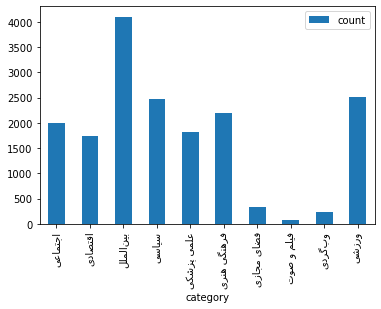

In [36]:
object2.plot_distribution()

In [37]:
cleaned_test=object2.cleaned_data
cleaned_test

,input,category
0,چشم آسمان به مناظر ایران روشن شد به گزارشحوز...,فرهنگی هنری
1,محمدعلي محمدي انحراف معيارها مولد مشكلات حوزه ...,فرهنگی هنری
2,اعلام مجموعه سریال های شبکه پنج بعد از عید فطر...,فرهنگی هنری
3,اعلام اسامی مستند های جشنواره فیلم مقاومت به گ...,فرهنگی هنری
4,تهرانگردی به خیابان سی تیر رسید به گزارش حوزه ...,فرهنگی هنری
...,...,...
17497,صعود سیتیزن ها با حذف پاریسی ها ترکیب اصلی دو...,ورزشی
17498,توصیف احسان پهلوان از حال و روز اين روزهاى است...,ورزشی
17499,جلسه فنی دیدار تیم های بسکتبال ایران و قزاقستا...,ورزشی
17500,نامزدهای بهترین گل هفته سوم لیگ قهرمانان آسیا ...,ورزشی


## Classification

In [38]:
class NaiveBayesClassifier:
    def __init__(self,cleaned_data):
        self.cleaned_data=cleaned_data
        self.cw_perclass=self.count_word_per_class()
        self.log_prior_each_class=self.calculate_log_prior()
    def count_word_per_class(self):
        list=[]
        list2=[]
        list3=[]
        list4=[]
        m=self.cleaned_data.groupby(["category"])
        for i in m:
            list.append(i)
        for (a,b) in list[1:]:
            list2.append(b)
            list3.append(a)
        for k in range(len(list2)):
            cw=object1.count_words(list2[:][k])
            list4.append(cw)
        cw_perclass=dict(zip(list3,list4))
        return cw_perclass

    def calculate_word_log_prob_per_class(self,word):
        p={}
        for key in self.cw_perclass.keys():
            if word in self.cw_perclass.get(key).keys():
                p[key]=math.log((self.cw_perclass.get(key)[word]+1)/(sum(self.cw_perclass.get(key).values()) + len(object1.frequencies.keys())))
            else:
                p[key]=math.log((1)/(sum(self.cw_perclass.get(key).values()) + len(object1.frequencies.keys())))
        return p
    def calculate_log_prior(self):
        len_data=len(self.cleaned_data)
        gb=self.cleaned_data.groupby(["category"])
        listt=[]
        listt2=[]
        listt3=[]
        len_each_class=[]
        log_prior=[]
        for i in gb:
            listt.append(i)
        for (a,b) in listt[1:]:
            listt2.append(b)
            listt3.append(a)
        for k in range(len(listt2)):
            len_each_class.append(len(listt2[:][k]))
        for t in len_each_class:
            log_prior.append(math.log(t/len_data))
        log_prior_each_class=dict(zip(listt3,log_prior))
        return log_prior_each_class
    def predict(self,string):
        dict_pred={}
        str=string.split()
        for key in self.cw_perclass.keys():
            sum=0
            for kalame in str:
                sum=sum + self.calculate_word_log_prob_per_class(kalame).get(key)
            sum=sum + self.log_prior_each_class.get(key)
            dict_pred[key]=sum
        maxi=max(dict_pred.values())
        for keyy in dict_pred.keys():
            if(dict_pred.get(keyy)==maxi):
                key_max=keyy
        print(dict_pred)
        print(key_max)
        return key_max
    def evaluate(self,c_data):
        pred_list=[]
        for string in c_data["input"]:
            pred_list.append(self.predict(string))
        Accuracy=accuracy_score(list(c_data["category"]),pred_list)
        Recall=recall_score(list(c_data["category"]),pred_list,average='micro')
        Precision=precision_score(list(c_data["category"]),pred_list,average='micro')
        F1_score=f1_score(list(c_data["category"]),pred_list,average='micro')
        return Accuracy,Recall,Precision,F1_score

In [39]:
object3=NaiveBayesClassifier(cleaned_train)

In [40]:
object3.cw_perclass

{'اجتماعی': {'و': 170184,
  'در': 136380,
  'به': 112001,
  'از': 81903,
  'با': 61604,
  'که': 51793,
  'این': 51093,
  'های': 42734,
  'را': 41028,
  'می': 40913,
  'است': 28406,
  'ها': 23165,
  'برای': 19482,
  'کرد': 19060,
  'تهران': 18652,
  'شده': 18421,
  'گفت': 16551,
  'آن': 15218,
  'وی': 15186,
  'است.': 14867,
  'اجتماعی': 14501,
  'یک': 12432,
  'تا': 12379,
  'باشگاه': 12225,
  'بر': 12068,
  'خبرنگاران': 12055,
  'خود': 11958,
  'سال': 11132,
  'کشور': 10386,
  'شود': 9547,
  'گزارش': 9376,
  'ای': 9348,
  'سازمان': 9320,
  'شهر': 9240,
  'شد': 9179,
  'ادامه': 9164,
  'افزود': 9156,
  'N': 9030,
  'خبرنگار': 9006,
  'منطقه': 8971,
  'نیز': 7847,
  'اشاره': 7741,
  'اینکه': 7698,
  'قرار': 7621,
  'باید': 7397,
  'استان': 7284,
  'طرح': 7131,
  'جوان': 6888,
  'گروه': 6692,
  'پلیس': 6647,
  'هم': 6619,
  'شهرداری': 6612,
  'انجام': 6442,
  'شود.': 6380,
  'اظهار': 6331,
  'کار': 6300,
  'بود': 6288,
  'بیان': 6274,
  'هزار': 6220,
  'داشت': 6146,
  'صورت': 6071,
  'کر

In [41]:
object3.calculate_word_log_prob_per_class('و')

{'اجتماعی': -3.1490343568421544,
 'اقتصادی': -3.227558898498678,
 'بین الملل': -3.566699870113387,
 'سیاسی': -3.0900648823261783,
 'علمی پزشکی': -3.1536613755019527,
 'فرهنگی هنری': -3.120876933013485,
 'فضای مجازی': -3.634301157322744,
 'فیلم و صوت ': -4.574075607889892,
 'وب گردی': -3.4058979354190626,
 'ورزشی': -3.426752205378604}

In [51]:
object3.calculate_word_log_prob_per_class('شهرداری')

{'اجتماعی': -6.396883028795213,
 'اقتصادی': -9.927257395799614,
 'بین الملل': -11.167123954382697,
 'سیاسی': -9.354367420912764,
 'علمی پزشکی': -9.719875341777986,
 'فرهنگی هنری': -9.163818594609404,
 'فضای مجازی': -10.79733882720997,
 'فیلم و صوت ': -12.97045617908938,
 'وب گردی': -10.824965676164078,
 'ورزشی': -7.860349777554519}

In [43]:
object3.log_prior_each_class

{'اجتماعی': -2.170871800633721,
 'اقتصادی': -2.315029513675583,
 'بین الملل': -1.4497080899473227,
 'سیاسی': -1.9615004917812313,
 'علمی پزشکی': -2.2786544158570794,
 'فرهنگی هنری': -2.078843966990977,
 'فضای مجازی': -3.914396220182823,
 'فیلم و صوت ': -5.5558494620489345,
 'وب گردی': -4.314966303702901,
 'ورزشی': -1.9165805084883325}

In [52]:
object3.predict('شهرداری')

{'اجتماعی': -8.567754829428935, 'اقتصادی': -12.242286909475197, 'بین الملل': -12.616832044330021, 'سیاسی': -11.315867912693996, 'علمی پزشکی': -11.998529757635065, 'فرهنگی هنری': -11.242662561600381, 'فضای مجازی': -14.711735047392793, 'فیلم و صوت ': -18.526305641138315, 'وب گردی': -15.13993197986698, 'ورزشی': -9.776930286042852}
اجتماعی


'اجتماعی'

In [46]:
object3.predict('برنامه روز هفتم')

{'اجتماعی': -25.226508794979793, 'اقتصادی': -26.595287251769506, 'بین الملل': -24.727126619547562, 'سیاسی': -24.92442644154106, 'علمی پزشکی': -26.252636521859248, 'فرهنگی هنری': -23.741826442155276, 'فضای مجازی': -28.63714040804088, 'فیلم و صوت ': -32.54938758309725, 'وب گردی': -28.278917774796454, 'ورزشی': -24.16435504031291}
فرهنگی هنری


'فرهنگی هنری'

In [47]:
object3.predict('برنامه فوتبال')

{'اجتماعی': -19.02929535261768, 'اقتصادی': -19.877721770113293, 'بین الملل': -18.431739007765554, 'سیاسی': -18.78198743000221, 'علمی پزشکی': -20.01135142842874, 'فرهنگی هنری': -17.647331586144823, 'فضای مجازی': -20.38286199603777, 'فیلم و صوت ': -22.72523653604123, 'وب گردی': -20.642865608921284, 'ورزشی': -14.245890869261228}
ورزشی


'ورزشی'

In [48]:
object3.predict('اسفراین؛ جولانگاه مقدونیان + تصاویر به گزارش خبرنگار حوزه میراث و گردشگری\xa0گروه فرهنگی باشگاه خبرنگاران جوان؛ محمد حسن خان اعتماد السلطنه به نقل از برخی منابع، اسفراین \xa0را چمن کالپوش دانسته است. چمن کالپوش بر اساس آنچه در اعتقادات اهالی منطقه مشهود است، آخرین منزلگاه داریوش سوم است. بنابراین باید دشت اسفراین را جولانگاه مقدونیان دانست. این دشت از دستبرد و سم ستوران یونانی در امان نبوده است. بنا بر این گزارش، شهر اسفراین امروزی در شمال غربی استان خراسان شمالی قرار گرفته است. این شهر دربرگیرنده بیش از ۲۵ بقعه از بزرگان و امامزادگان است. شایان ذکر است؛ شهر فعلی اسفراین از ۱۹ محله تشکیل شده و زیستگاه حیواناتی، چون آهو، گرگ، گورکن، خرگوش، روباه، گراز، پلنگ، کفتار و بز کوهی است. منطقه حفاظت\u200cشده ساری گل در شمال شرقی اسفراین قرار گرفته است. گفتنی است؛ ابوعبدلله حمد بن احمد مقدسی در خصوص اسفراین می\u200cنویسد: اسفراین روستایی بزرگ و مرکز انگور خوب و کشتزار است، جاده گرگان آن را به دو نیمه می\u200cکند. شهر آن به همین نام است. آباد و گرانقدر است، از نهری که از کوه می\u200cآید می\u200cآشامند در شهر\u200cهای این روستا مهم\u200cتر از آن نیست. مردم آن اهل حدیثند. خاطرنشان می\u200cشود؛ ابوعبدالله الحاکم مؤلف تاریخ نیشابور نیز اسفراین را شهری خوش آب و هوا ذکر کرده\u200c است و قباد پادشاه ساسانی نام اسفراین را به علت')

{'اجتماعی': -2027.0538379576005, 'اقتصادی': -2077.630226068853, 'بین الملل': -2143.790618475225, 'سیاسی': -2103.1382650113173, 'علمی پزشکی': -2108.8276583136008, 'فرهنگی هنری': -2022.7407040790797, 'فضای مجازی': -2130.884374324979, 'فیلم و صوت ': -2220.0698322392705, 'وب گردی': -2052.001777737467, 'ورزشی': -2146.38995993029}
فرهنگی هنری


'فرهنگی هنری'

In [49]:
object3.evaluate(cleaned_train[:100])

{'اجتماعی': -1948.7417109424523, 'اقتصادی': -2020.5540473794786, 'بین الملل': -2071.2152112650883, 'سیاسی': -2027.285292591739, 'علمی پزشکی': -2049.6494319563703, 'فرهنگی هنری': -1933.1128123721815, 'فضای مجازی': -2103.4817951297273, 'فیلم و صوت ': -2254.542392212063, 'وب گردی': -2021.7237206896677, 'ورزشی': -2099.0521071163394}
فرهنگی هنری
{'اجتماعی': -4396.079381847413, 'اقتصادی': -4579.40120397295, 'بین الملل': -4588.12707624935, 'سیاسی': -4398.537379134945, 'علمی پزشکی': -4481.65185155435, 'فرهنگی هنری': -4112.609424273234, 'فضای مجازی': -4538.842478271043, 'فیلم و صوت ': -5039.975101318602, 'وب گردی': -4376.44710083282, 'ورزشی': -4616.911857867074}
فرهنگی هنری
{'اجتماعی': -2702.4120962112074, 'اقتصادی': -2850.706635943646, 'بین الملل': -2852.753582886441, 'سیاسی': -2751.5566920821134, 'علمی پزشکی': -2785.626096055903, 'فرهنگی هنری': -2521.248599261527, 'فضای مجازی': -2844.3412769273255, 'فیلم و صوت ': -3134.6362922859253, 'وب گردی': -2765.884229397016, 'ورزشی': -2778.0164892600064

{'اجتماعی': -894.0251191455695, 'اقتصادی': -934.40912822436, 'بین الملل': -928.7462513723916, 'سیاسی': -892.0067903215919, 'علمی پزشکی': -901.089345812524, 'فرهنگی هنری': -862.0262068955988, 'فضای مجازی': -938.23579358715, 'فیلم و صوت ': -1076.9853096058157, 'وب گردی': -934.9540595295845, 'ورزشی': -953.6530838405985}
فرهنگی هنری
{'اجتماعی': -2530.7137992457633, 'اقتصادی': -2609.9095761420344, 'بین الملل': -2648.569857183438, 'سیاسی': -2585.2000434664133, 'علمی پزشکی': -2595.7485200153083, 'فرهنگی هنری': -2361.7889208375764, 'فضای مجازی': -2621.7260732756845, 'فیلم و صوت ': -2957.402526736281, 'وب گردی': -2639.3894412527675, 'ورزشی': -2572.995947439037}
فرهنگی هنری
{'اجتماعی': -1900.4307621618473, 'اقتصادی': -1958.2242883933593, 'بین الملل': -1971.1416369445383, 'سیاسی': -1913.9094014600664, 'علمی پزشکی': -1903.2063923775725, 'فرهنگی هنری': -1839.7209506068154, 'فضای مجازی': -1932.555973153501, 'فیلم و صوت ': -2178.6984061319426, 'وب گردی': -1944.1324686838298, 'ورزشی': -1975.9650823936

{'اجتماعی': -2885.8022055248107, 'اقتصادی': -2944.2382361672944, 'بین الملل': -3082.7794692238335, 'سیاسی': -2948.1880609980794, 'علمی پزشکی': -2903.748372326936, 'فرهنگی هنری': -2762.5246961813095, 'فضای مجازی': -2955.6641566988906, 'فیلم و صوت ': -3355.4226177900823, 'وب گردی': -3061.1703987789147, 'ورزشی': -3115.1948265160568}
فرهنگی هنری
{'اجتماعی': -3281.8786609189715, 'اقتصادی': -3433.622835800336, 'بین الملل': -3250.4737339424305, 'سیاسی': -3296.07887796742, 'علمی پزشکی': -3367.2936771572145, 'فرهنگی هنری': -2981.4328960936928, 'فضای مجازی': -3312.622271256059, 'فیلم و صوت ': -3688.482537897096, 'وب گردی': -3237.504313083209, 'ورزشی': -3263.034851237293}
فرهنگی هنری
{'اجتماعی': -1312.1567813374381, 'اقتصادی': -1322.7570023049627, 'بین الملل': -1391.6492550074906, 'سیاسی': -1342.8856964478796, 'علمی پزشکی': -1333.393856113689, 'فرهنگی هنری': -1177.3952179371313, 'فضای مجازی': -1448.492818881714, 'فیلم و صوت ': -1494.136466400923, 'وب گردی': -1357.2421888181257, 'ورزشی': -1422.446

{'اجتماعی': -2223.360004172971, 'اقتصادی': -2347.2621559788854, 'بین الملل': -2338.2724624376388, 'سیاسی': -2240.947892792959, 'علمی پزشکی': -2273.7529437110375, 'فرهنگی هنری': -2091.9703466210326, 'فضای مجازی': -2354.7463255061107, 'فیلم و صوت ': -2658.1645992151257, 'وب گردی': -2334.6872920212836, 'ورزشی': -2309.090110122226}
فرهنگی هنری
{'اجتماعی': -611.7137983395722, 'اقتصادی': -663.299790272414, 'بین الملل': -641.4091843606265, 'سیاسی': -627.940042710685, 'علمی پزشکی': -620.8104772380168, 'فرهنگی هنری': -609.7136410864099, 'فضای مجازی': -682.7413453240397, 'فیلم و صوت ': -784.9056423158834, 'وب گردی': -664.2524972024664, 'ورزشی': -620.3428507162289}
فرهنگی هنری
{'اجتماعی': -2183.838308928363, 'اقتصادی': -2212.0349751531794, 'بین الملل': -2249.2619498426184, 'سیاسی': -2194.8184728706406, 'علمی پزشکی': -2168.1509750140835, 'فرهنگی هنری': -2100.6054458432322, 'فضای مجازی': -2242.7092511122646, 'فیلم و صوت ': -2578.84391985164, 'وب گردی': -2298.671976096728, 'ورزشی': -2275.02572918059

(0.91, 0.91, 0.91, 0.91)

In [50]:
object3.evaluate(cleaned_test[:100])

{'اجتماعی': -1699.9056206347013, 'اقتصادی': -1741.29695587697, 'بین الملل': -1738.6866043980576, 'سیاسی': -1722.1363415266571, 'علمی پزشکی': -1713.4128539208557, 'فرهنگی هنری': -1630.8590140213807, 'فضای مجازی': -1691.1816231597666, 'فیلم و صوت ': -1897.338593012066, 'وب گردی': -1707.2704689771513, 'ورزشی': -1785.2732657862223}
فرهنگی هنری
{'اجتماعی': -1524.8459980200844, 'اقتصادی': -1546.2052718528414, 'بین الملل': -1579.2943053485417, 'سیاسی': -1492.2357210399532, 'علمی پزشکی': -1554.068032673282, 'فرهنگی هنری': -1435.9383332201717, 'فضای مجازی': -1677.8112259244895, 'فیلم و صوت ': -1721.5559235801022, 'وب گردی': -1536.8922571650762, 'ورزشی': -1680.2617997597772}
فرهنگی هنری
{'اجتماعی': -1941.4017974338797, 'اقتصادی': -2035.3612075491446, 'بین الملل': -2033.963933319736, 'سیاسی': -1979.9905702485494, 'علمی پزشکی': -1987.2319450387413, 'فرهنگی هنری': -1756.1833907431776, 'فضای مجازی': -2006.584032354322, 'فیلم و صوت ': -2238.551060042691, 'وب گردی': -1940.0481998924702, 'ورزشی': -1993

{'اجتماعی': -6338.517392330835, 'اقتصادی': -6516.972315791905, 'بین الملل': -6347.068789426819, 'سیاسی': -6196.911586349816, 'علمی پزشکی': -6434.850401715921, 'فرهنگی هنری': -5768.699385807904, 'فضای مجازی': -6801.345754938281, 'فیلم و صوت ': -6916.424666811066, 'وب گردی': -6062.075516084138, 'ورزشی': -6801.407472684308}
فرهنگی هنری
{'اجتماعی': -1921.2610897556415, 'اقتصادی': -1997.119031992188, 'بین الملل': -1982.337161893378, 'سیاسی': -1939.5768772082577, 'علمی پزشکی': -1992.3897105947735, 'فرهنگی هنری': -1685.3025848288773, 'فضای مجازی': -2093.357231197355, 'فیلم و صوت ': -2076.852191217539, 'وب گردی': -1840.576791584161, 'ورزشی': -2082.8814276414405}
فرهنگی هنری
{'اجتماعی': -2268.7223978165853, 'اقتصادی': -2337.4013969607295, 'بین الملل': -2446.8115359516482, 'سیاسی': -2317.22598506456, 'علمی پزشکی': -2321.4418134696602, 'فرهنگی هنری': -2297.647237710216, 'فضای مجازی': -2475.867199910771, 'فیلم و صوت ': -2825.799648438251, 'وب گردی': -2494.672588667586, 'ورزشی': -2470.926750434104}

{'اجتماعی': -618.8775568277495, 'اقتصادی': -695.5669304015828, 'بین الملل': -690.2186171060143, 'سیاسی': -620.1469503232463, 'علمی پزشکی': -662.0843744433113, 'فرهنگی هنری': -576.5468825005655, 'فضای مجازی': -681.2102900566949, 'فیلم و صوت ': -726.9273833241693, 'وب گردی': -637.4484317859618, 'ورزشی': -651.7659887848969}
فرهنگی هنری
{'اجتماعی': -2927.2290625917835, 'اقتصادی': -3143.091179582928, 'بین الملل': -2921.2993138969123, 'سیاسی': -2995.7029285533386, 'علمی پزشکی': -3012.8405110201834, 'فرهنگی هنری': -2770.5065129387854, 'فضای مجازی': -2971.7142426071127, 'فیلم و صوت ': -3252.7705179266336, 'وب گردی': -2873.4057014401724, 'ورزشی': -2913.1312144058684}
فرهنگی هنری
{'اجتماعی': -2251.495902512247, 'اقتصادی': -2347.1399184849097, 'بین الملل': -2404.1476170210826, 'سیاسی': -2278.025360068883, 'علمی پزشکی': -2271.1762139625434, 'فرهنگی هنری': -2207.1530955996272, 'فضای مجازی': -2384.853452257857, 'فیلم و صوت ': -2715.209462369834, 'وب گردی': -2374.976853826569, 'ورزشی': -2428.64523268

{'اجتماعی': -3007.392024960776, 'اقتصادی': -3141.2068024329647, 'بین الملل': -3076.9233912760915, 'سیاسی': -2944.874505543472, 'علمی پزشکی': -3042.071265978093, 'فرهنگی هنری': -2790.5717904706435, 'فضای مجازی': -3074.578851129932, 'فیلم و صوت ': -3196.2962328034314, 'وب گردی': -2844.2853760911817, 'ورزشی': -3114.5376948724156}
فرهنگی هنری
{'اجتماعی': -568.4328895863063, 'اقتصادی': -602.2348859429185, 'بین الملل': -595.7522818211396, 'سیاسی': -579.2095194365634, 'علمی پزشکی': -575.4920454570425, 'فرهنگی هنری': -545.6931503177117, 'فضای مجازی': -610.9800906893347, 'فیلم و صوت ': -700.4157152079986, 'وب گردی': -609.4616056888983, 'ورزشی': -590.8871474220282}
فرهنگی هنری
{'اجتماعی': -2429.0665624659464, 'اقتصادی': -2595.425164261363, 'بین الملل': -2445.1823714903376, 'سیاسی': -2505.3290260699305, 'علمی پزشکی': -2494.141544851767, 'فرهنگی هنری': -2341.859317971816, 'فضای مجازی': -2501.2580708138635, 'فیلم و صوت ': -2767.9031883048556, 'وب گردی': -2422.9739984046073, 'ورزشی': -2424.541800082

(0.89, 0.89, 0.89, 0.89)